Esse é um notebook próprio para modelar sistema massa-mola/amortecedor. Partindo de uma análise simples até análise com duas massas. Parte do material tomou como base o trabalho de [Halvorsen](https://www.halvorsen.blog/documents/programming/python/resources/powerpoints/Mass-Spring-Damper%20System%20with%20Python.pdf).

# Introduction

A mass-damper-spring system under forced vibration is being represented by the following picture.

<img src="https://sumemura.jp/wp-content/uploads/2020/05/vibration1_Diagram_GenericInput-768x325.png" alt="Texto Alternativo" width="400" height="200"/>

To model the motion equation of the previous block, suppose that a force in the time domain acts from left to right. Both the spring and the damper will act in opposition to the movement, aiming to restore the balance of the mass. Therefore, the motion equation of the previous block is given by:

\begin{align*}
F-c\dot{x}-k{x} = m\ddot{x}
\end{align*}

$F$ is an external force applied to the system, $c$ is the damping constant, $k$ is the spring stiffness, and $m$ is the mass. The variable $x$ represents the position of mass $m$. $\dot{x}$ is the derivative of the position, representing the oscillation velocity of the mass. Finally, $\ddot{x}$ is the second derivative of the position, representing the acceleration of the mass.

Higher-order differential equations can be reformulated into a system of first-order differential equations.

Let's define:

\begin{align*}
x = x_{1} \\
\dot{x} = x_{2}
\end{align*}

Here, $x_{1}$ indicates the position, and $x_{2}$ indicates the velocity. Thus, we can create two first-order partial derivative equations.

\begin{align}
\dot{x}_{1} = x_{2} \\
\dot{x}_{2} = \frac{1}{m}(F - cx_{2} - kx_{1})
\end{align}


#1) SciPy ODE Solver

Let's start using the ordinary equation solver from the SciPy library.

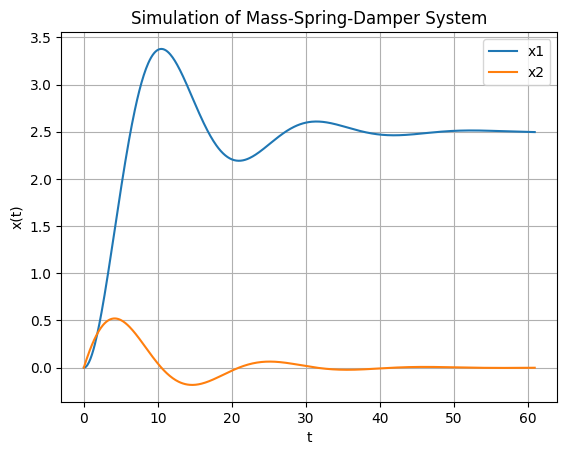

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Initialization
tstart = 0
tstop = 60
increment = 0.1

# Initial condition
x_init = [0, 0]
t = np.arange(tstart, tstop + 1, increment)

# Function that returns dx/dt
def mydiff(x, t):
    c = 4  # Damping constant
    k = 2  # Stiffness of the spring
    m = 20 # Mass
    F = 5
    dx1dt = x[1]
    dx2dt = (F - c * x[1] - k * x[0]) / m
    dxdt = [dx1dt, dx2dt]
    return dxdt

# Solve ODE
x = odeint(mydiff, x_init, t)
x1 = x[:, 0] # Position
x2 = x[:, 1] # Velocity

# Plot the Results
plt.plot(t, x1)
plt.plot(t, x2)
plt.title('Simulation of Mass-Spring-Damper System')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(["x1", "x2"])
plt.grid()
plt.show()

# 2) State space representation

## 2.1) Theoretical background

Let's proceed to establish the state-space approach as an alternative method for representing physical systems. This section sets the stage for the formal definition of the state-space representation, presenting some observations about systems and their variables. Our examples adopt the following approach:

1. We choose a particular subset of all possible system variables and refer to the variables in this subset as state variables.
2. For an _n_-th order system, we write _n simultaneous first-order differential equations_ in terms of the state variables. We refer to this system of simultaneous differential equations as _state equations_.
3. If we know the initial condition of all state variables at $t_{0}$, as well as the system input for $t ≥ t_{0}$, we can solve the simultaneous differential equations for the state variables for $t ≥ t_{0}$.
4. We algebraically combine the state variables with the system input and determine all other system variables for $t ≥ t_{0}$. We call this algebraic equation the _output equation_.
5. We consider the state equations and the output equation a viable representation of the system. We call this representation of the system the _state-space representation_.

Let's formalize some definitions given earlier:

1. **System Variable**: Any variable that responds to an input or initial conditions in a system.
2. **State Variables**: The smallest set of linearly independent system variables, such that the values of the elements of the set at time $t_{0}$ together with known forcing functions completely determine the value of all system variables for all $t ≥ t_{0}$. State vector. A vector whose elements are the state variables.
3. **State Space**: The n-dimensional space whose axes are the state variables.

Now that the definitions have been formally stated, we define the state-space representation of a system. A system is represented in state space by the following equations:

\begin{align*}
\mathbf{\dot{x}} &= \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} \\
\mathbf{y} &= \mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
\end{align*}

for $t ≥ t_{0}$ and initial conditions, $\mathbf{x}(t_{0})$, where

$\mathbf{x}$ = state vector

$\mathbf{\dot{x}}$ = derivative of the state vector with respect to time

$\mathbf{y}$ = output vector

$\mathbf{u}$ = input vector or control vector

$\mathbf{A}$ = system matrix

$\mathbf{B}$ = input matrix

$\mathbf{C}$ = output matrix

$\mathbf{D}$ = direct transmission matrix

The first equation is called the state equation, and the vector x, the state vector, contains the state variables. The second equation is called the output equation. This equation is used to calculate any other system variables. This representation of a system provides complete knowledge of all system variables at any time $t ≥ t_{0}$.

The system presented in the introduction has the following state-space representation:

$
  \begin{bmatrix}
    \dot{x_{1}} \\
    \dot{x_{2}}
  \end{bmatrix}
  =
  \begin{bmatrix}
    0 & 1 \\
    \frac{-k}{m} & \frac{-c}{m}
  \end{bmatrix}
  \begin{bmatrix}
    x_{1} \\
    x_{2}
  \end{bmatrix}
  +
  \begin{bmatrix}
    0 \\
    \frac{1}{m}
  \end{bmatrix}
  F  
$

Notice the similarity with the state equation presented earlier.

$
A =
  \begin{bmatrix}
    0 & 1 \\
    \frac{-k}{m} & \frac{-c}{m}
  \end{bmatrix},
B =
  \begin{bmatrix}
    0 \\
    \frac{1}{m}
  \end{bmatrix},
x =
  \begin{bmatrix}
    x_{1} \\
    x_{2}
  \end{bmatrix}.
$

Now, let's proceed to the implementation.

Resource: N. Nise. "Control Systems Engineering"


## 2.2) Implementing State-Space using SciPy.

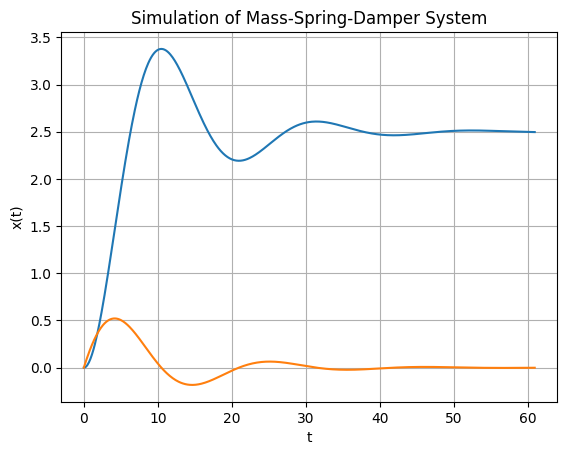

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
# Parameters defining the system
c = 4 # Damping constant
k = 2 # Stiffness of the spring
m = 20 # Mass
F = 5 # Force
Ft = np.ones(610)*F
# Simulation Parameters
tstart = 0
tstop = 60
increment = 0.1
t = np.arange(tstart,tstop+1,increment)
# System matrices
A = [[0, 1], [-k/m, -c/m]] # Matriz do sistema
B = [[0], [1/m]] # Matriz de entrada
C = [[1, 0]] # Matriz de saída
sys = sig.StateSpace(A, B, C, 0)
# Step response for the system
t, y, x = sig.lsim(sys, Ft, t)
x1 = x[:,0]
x2 = x[:,1]
plt.plot(t, x1, t, x2)
#plt.plot(t, y)
plt.title('Simulation of Mass-Spring-Damper System')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

# 3) Discretization

Here, we consider that the derivative is a linear approximation. It's just a matter of recalling the ratio between the difference of something over the difference in time.

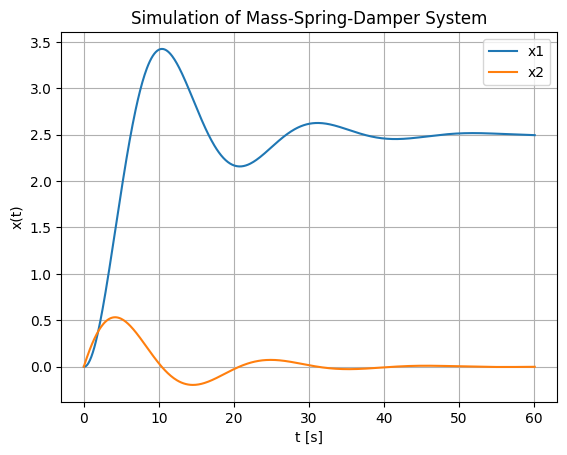

In [ ]:
# Simulation of Mass-Spring-Damper System
import numpy as np
import matplotlib.pyplot as plt
# Model Parameters
c = 4 # Damping constant
k = 2 # Stiffness of the spring
m = 20 # Mass
F = 5 # Force
# Simulation Parameters
Ts = 0.1
Tstart = 0
Tstop = 60
N = int((Tstop-Tstart)/Ts) # Simulation length
x1 = np.zeros(N+2)
x2 = np.zeros(N+2)
x1[0] = 0 # Initial Position
x2[0] = 0 # Initial Speed
a11 = 1
a12 = Ts
a21 = -(Ts*k)/m
a22 = 1 - (Ts*c)/m
b1 = 0
b2 = Ts/m
# Simulation
for k in range(N+1):
    x1[k+1] = a11 * x1[k] + a12 * x2[k] + b1 * F
    x2[k+1] = a21 * x1[k] + a22 * x2[k] + b2 * F
# Plot the Simulation Results
t = np.arange(Tstart,Tstop+2*Ts,Ts)
#plt.plot(t, x1, t, x2)
plt.plot(t,x1)
plt.plot(t,x2)
plt.title('Simulation of Mass-Spring-Damper System')
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.grid()
plt.legend(["x1", "x2"])
plt.show()

# 4) Comparative Examples

This section presents four examples of mass-spring-damper systems for analysis. Let's consider the state-space representation for each system.

## 4.1) Forced Vibration without Damping and Single Mass

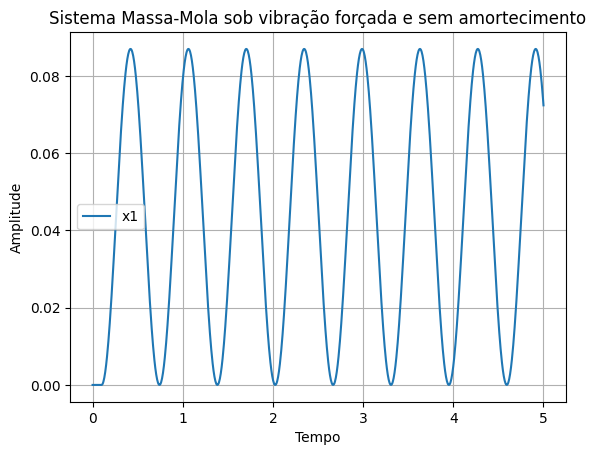

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parâmetros do sistema
m = 240     # Massa
k = 23000   # Constante da mola

# Definindo as ODEs do sistema
def one_mass_forced_undamped_model(x, t):
    # x[0] é a posição
    # x[1] é a velocidade
    F = np.where(t < 0.1, 0, 1000)
    dx1dt = x[1]
    dx2dt = (F - k * x[0]) / m
    dxdt = [dx1dt, dx2dt]
    return dxdt

# Condições iniciais
x0 = [0.0, 0.0]

# Tempo de integração
t = np.linspace(0, 5, 1000)

# Resolvendo as ODEs usando odeint
solution = odeint(one_mass_forced_undamped_model, x0, t)

# Extraindo posições e velocidades
x1 = solution[:, 0] # Posição
x2 = solution[:, 1] # Velocidade

# Plotando os resultados
plt.plot(t, x1, label='x1')
plt.title('Sistema Massa-Mola sob vibração forçada e sem amortecimento')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## 4.2) Forced Vibration with Damping and Single Mass

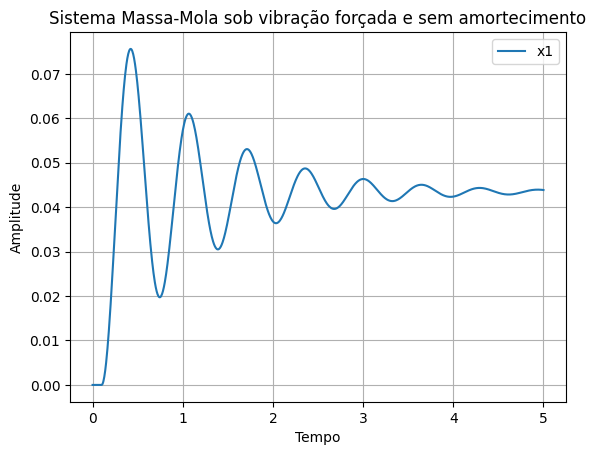

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parâmetros do sistema
m = 240     # Massa
k = 23000   # Constante da mola
c = 450     # Coeficiente de amortecimento

# Definindo as ODEs do sistema
def one_mass_forced_damped(x, t):
    # x[0] é a posição
    # x[1] é a velocidade
    F = np.where(t < 0.1, 0, 1000)
    dx1dt = x[1]
    dx2dt = (F - c * x[1] - k * x[0]) / m
    dxdt = [dx1dt, dx2dt]
    return dxdt

# Condições iniciais
x0 = [0.0, 0.0]

# Tempo de integração
t = np.linspace(0, 5, 1000)

# Resolvendo as ODEs usando odeint
solution = odeint(one_mass_forced_damped, x0, t)

# Extraindo posições e velocidades
x1 = solution[:, 0] # Posição
x2 = solution[:, 1] # Velocidade

# Plotando os resultados
plt.plot(t, x1, label='x1')
plt.title('Sistema Massa-Mola sob vibração forçada e sem amortecimento')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

## 4.3) Free Vibration with Damping and Single Mass

In the example below, there is no external force, but there is a time-varying displacement.


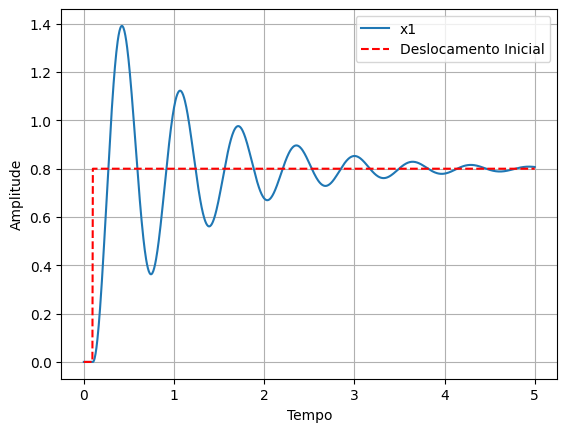

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parâmetros do sistema
m = 240       # Massa
k = 23000     # Constante da mola
c = 450       # Coeficiente de amortecimento

# Definindo as ODEs do sistema com impulso/deslocamento inicial
def one_mass_free_damped(x, t):
    # x[0] é a posição
    # x[1] é a velocidade
    w = np.where(t < 0.1, 0, 0.8)  # Impulso/deslocamento inicial
    dx1dt = x[1]
    dx2dt = (-k * (x[0] - w) - c * x[1]) / m
    dxdt = [dx1dt, dx2dt]
    return dxdt

# Condições iniciais considerando o deslocamento inicial
x0 = [0.0, 0.0]  # O deslocamento inicial é incorporado nas condições iniciais

# Tempo de integração
t = np.linspace(0, 5, 1000)

# Resolvendo as ODEs usando odeint
solution = odeint(one_mass_free_damped, x0, t)

# Extraindo posições e velocidades
x1 = solution[:, 0]
x2 = solution[:, 1]

# Plotando os resultados
plt.plot(t, x1, label='x1')
plt.plot(t, np.where(t < 0.1, 0, 0.8), label='Deslocamento', linestyle='--', color='red')
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.legend()
plt.grid(True)
plt.show()

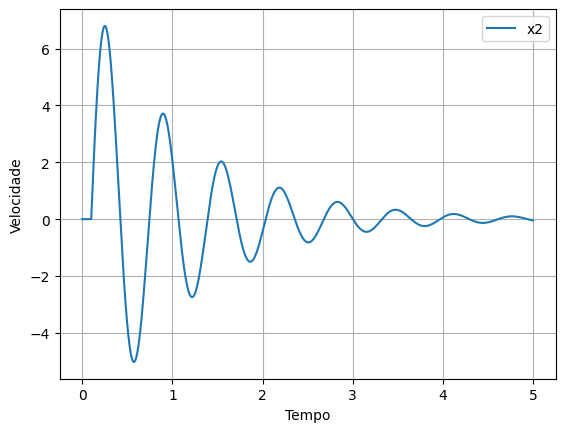

In [ ]:
#Plotando a velocidade
plt.plot(t, x2, label='x2')
plt.ylabel('Velocidade')
plt.xlabel('Tempo')
plt.legend()
plt.grid(True)
plt.show()

## 4.4) Free Vibration with Damping and Two Masses

This example is intended for use in a simple model of autonomous vehicle suspension.

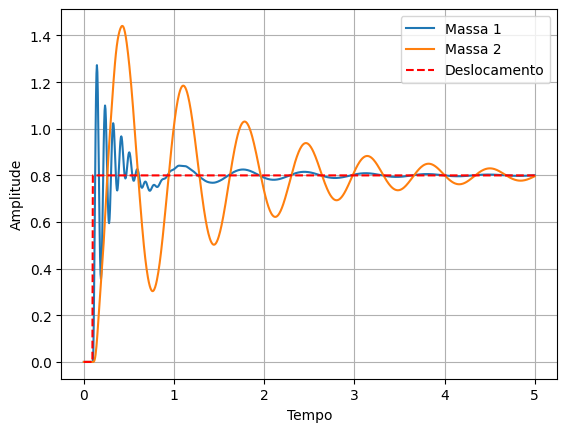

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parâmetros da roda
m1 = 45         # Wheel mass
k1 = 198000     # Wheel stiffness
c1 = 100        # Coeficiente de amortecimento 1
#Parâmetros do veículo
m2 = 240        # Massa 2
k2 = 23000      # Constante da mola 2
c2 = 450        # Coeficiente de amortecimento 2

# Definindo as ODEs do sistema com deslocamento inicial para duas massas
def two_mass_free_damped(x, t):
    # x[0] é o deslocamento da massa 1
    # x[1] é a velocidade da massa 1
    # x[2] é o deslocamento da massa 2
    # x[3] é a velocidade da massa 2
    w = np.where(t < 0.1, 0, 0.8)  # Deslocamento inicial
    dx1dt = x[1]
    dx2dt = (-k1 * (x[0] - w) - c1 * (x[1] - w) + k2 * (x[2] - x[0]) + c2 * (x[3] - x[1])) / m1
    dx3dt = x[3]
    dx4dt = (-k2 * (x[2] - x[0]) - c2 * (x[3] - x[1])) / m2
    dydt = [dx1dt, dx2dt, dx3dt, dx4dt]
    return dydt

# Condições iniciais
x0 = [0.0, 0.0, 0.0, 0.0] # Pares de descolamento inicial e velocidade incial nulas

# Tempo de integração
t = np.linspace(0, 5, 1000)

# Resolvendo as ODEs usando odeint
solution = odeint(two_mass_free_damped, x0, t)

# Extraindo posições das massas
x1 = solution[:, 0] # Deslocmento da roda - m1
x3 = solution[:, 2] # Deslocamento do veículo - m2

# Plotando os resultados
plt.plot(t, x1, label='Massa 1')
plt.plot(t, x3, label='Massa 2')
plt.plot(t, np.where(t < 0.1, 0, 0.8), label='Deslocamento', linestyle='--', color='red')
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.legend()
plt.grid(True)
plt.show()